<a href="https://colab.research.google.com/github/Marcelo-S-Pereira/data_exp/blob/main/An%C3%A1lise_Viagens_Portal_da_Transpar%C3%AAncia_ver_outliers_por_se_tratar_de_despesas_por_dias_de_viagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Portal da Transparência - **Viagens de servidores**
Fazendo testes com dados do **portal da transparência**


Baixar os arquivos no link abaixo:
```
https://portaldatransparencia.gov.br/download-de-dados/viagens
```






#Acessando a base de dados

In [30]:
Ano = 2023

In [31]:
caminho_dados = f'/content/drive/MyDrive/Análise de Dados de viagens realizadas - Portal da transparência/{Ano}_Viagem.csv'


In [32]:
caminho_output = f'/content/drive/MyDrive/Análise de Dados de viagens realizadas - Portal da transparência/output/Viagens-Passagens-trechos_{Ano}.xlsx'

#Importando as bibliotecas

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


#Convertendo dados, encodificando e formatando para visualização

In [34]:
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format','{:.2f}'.format)
df_viagens = pd.read_csv(caminho_dados, sep=';', encoding='windows - 1252', decimal=',')



#Gera a coluna de gastos

In [35]:
df_viagens['Despesas'] = df_viagens['Valor diárias'] + df_viagens['Valor passagens'] + df_viagens['Valor outros gastos']

#Considera os valores nulos do Cargo

In [36]:
df_viagens['Cargo'] = df_viagens['Cargo'].fillna('NÃO IDENTIFICADO')

#Convertendo a data de início e fim da viagem

In [37]:
df_viagens["Período - Data de início"] = pd.to_datetime(df_viagens["Período - Data de início"], format='%d/%m/%Y')
df_viagens["Período - Data de fim"] = pd.to_datetime(df_viagens["Período - Data de fim"], format='%d/%m/%Y')

In [38]:
df_viagens["Mês da viagem"] = df_viagens['Período - Data de início'].dt.month_name()


#Gera a coluna nova para ver o mês da viagem

In [39]:
df_viagens["Dias de Viagem"] = (df_viagens["Período - Data de fim"] - df_viagens["Período - Data de início"]).dt.days

#Definir normalização da coluna cargos, e resetar o índice

In [40]:
df_cargos = df_viagens['Cargo'].value_counts(normalize=True).reset_index()

#Definir a variável para gerar o df com colunas agregadas e calculadas

In [41]:
df_viagens_consolidado = (
  df_viagens
  .groupby('Cargo')
  .agg(
     despesas_médias=('Despesas', 'mean'),
     duração_média=('Dias de Viagem', 'mean'),
     despesas_totais=('Despesas', 'sum'),
     destino_mais_frequente=('Destinos', pd.Series.mode),
     numero_de_viagens=('Nome', 'count')
     )
  .reset_index()
 )

#Localizar cargos relevantes e que equivalem acima de 1% do número de viagens e os cargos não relevantes que equilavem abaixo de 1% do número de viagens.

In [42]:
cargos_relevantes = df_cargos.loc[df_cargos['proportion'] >= 0.01, 'Cargo']

In [43]:
#localizar cargos não relavantes que equivalem abaixo de 1% das viagens
cargos_nao_relevantes = df_cargos.loc[df_cargos['proportion'] < 0.01, 'Cargo']

In [44]:
#definir os cargos da tabela consolidado estão em cargos relevantes
filtro_relevantes = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)

In [45]:
#definir os cargos da tabela consolidado estão em cargos relevantes
filtro_n_relevantes = df_viagens_consolidado['Cargo'].isin(cargos_nao_relevantes)

In [46]:
df_viagens_consolidado[filtro_relevantes].sort_values(by='despesas_totais', ascending=False)

,Cargo,despesas_médias,duração_média,despesas_totais,destino_mais_frequente,numero_de_viagens
495,NÃO IDENTIFICADO,3260.38,8.02,1056755039.37,Brasília/DF,324120
444,Informações protegidas por sigilo,3176.92,7.54,376251581.25,Informações protegidas por sigilo,118433
570,PROFESSOR DO MAGISTERIO SUPERIOR,2031.32,4.21,111391698.38,Brasília/DF,54837
571,PROFESSOR ENS BASICO TECN TECNOLOGICO,1403.39,2.40,52840611.20,Brasília/DF,37652
688,TECNICO DO SEGURO SOCIAL,4305.08,11.37,45986884.95,Brasília/DF,10682
72,ANALISTA AMBIENTAL,2595.31,5.13,35374126.69,Brasília/DF,13630
210,AUDITOR-FISCAL DA RECEITA FEDERAL BRASIL,2417.95,2.84,24406804.29,Brasília/DF,10094
209,AUDITOR FISCAL FEDERAL AGROPECUARIO,1466.35,2.06,24319379.12,Brasília/DF,16585
316,CONTRATADO LEI 8745/93 - NI,984.45,2.84,17510463.07,Bauru/SP,17787
778,TECNICO INFOR GEOGRAFICAS E ESTATISTICA,1457.08,3.19,15816641.46,Brasília/DF,10855


#RANKING VIAGENS RELEVANTES: definir o df resumido acima de 1% de volume de viagens e com as colunas agregadas, classificando por maiores despesas primeiro

In [47]:
#Tabela com filtro
df_viagens_consolidado[filtro_n_relevantes].sort_values(by='despesas_totais', ascending=False)

,Cargo,despesas_médias,duração_média,despesas_totais,destino_mais_frequente,numero_de_viagens
390,ESP EM REGULACAO E VIGILANCIA SANITARIA,13005.85,5.29,24451002.94,São Paulo/SP,1880
652,TECNICO AMBIENTAL,2921.69,7.84,17413282.15,Brasília/DF,5960
95,ANALISTA DO SEGURO SOCIAL,2493.00,5.13,15997563.53,Brasília/DF,6417
481,MINISTRO DE PRIMEIRA CLASSE,19071.73,5.92,15943970.39,Brasília/DF,836
15,AGENTE ADMINISTRATIVO,2968.39,5.08,15023006.31,Brasília/DF,5061
...,...,...,...,...,...,...
455,LOCUTOR,0.00,7.00,0.00,"[Catuti/MG, Catuti/MG, Catuti/MG, Catuti/MG, C...",2
726,TECNICO EM GEOLOGIA,0.00,0.00,0.00,Morro Redondo/RS,3
302,CENOTECNICO,0.00,5.00,0.00,Porangatu/GO,1
567,PROFESSOR ADJUNTO,0.00,5.00,0.00,Buenos Aires/Argentina,1


In [48]:
#definição da base fonte do gráfico de barras, classificada por "número de viagens"
df_final = df_viagens_consolidado[filtro_relevantes].sort_values(by='numero_de_viagens', ascending=False)


# Despesas de Servidor Publico em viagens - Número de viagens por Cargo
- Neste Ranking o número de viagens por cargo, o "Não identificado" dá uma visão de que 324 mil registros de viagem não tem cargo informado
- Os cargos protegidos por sigilo chegam a mais de 118 mil viagens que são ocultados os cargos por proteção
-Os cargos de professor de magistério superior somam mais de 54 mil viagens



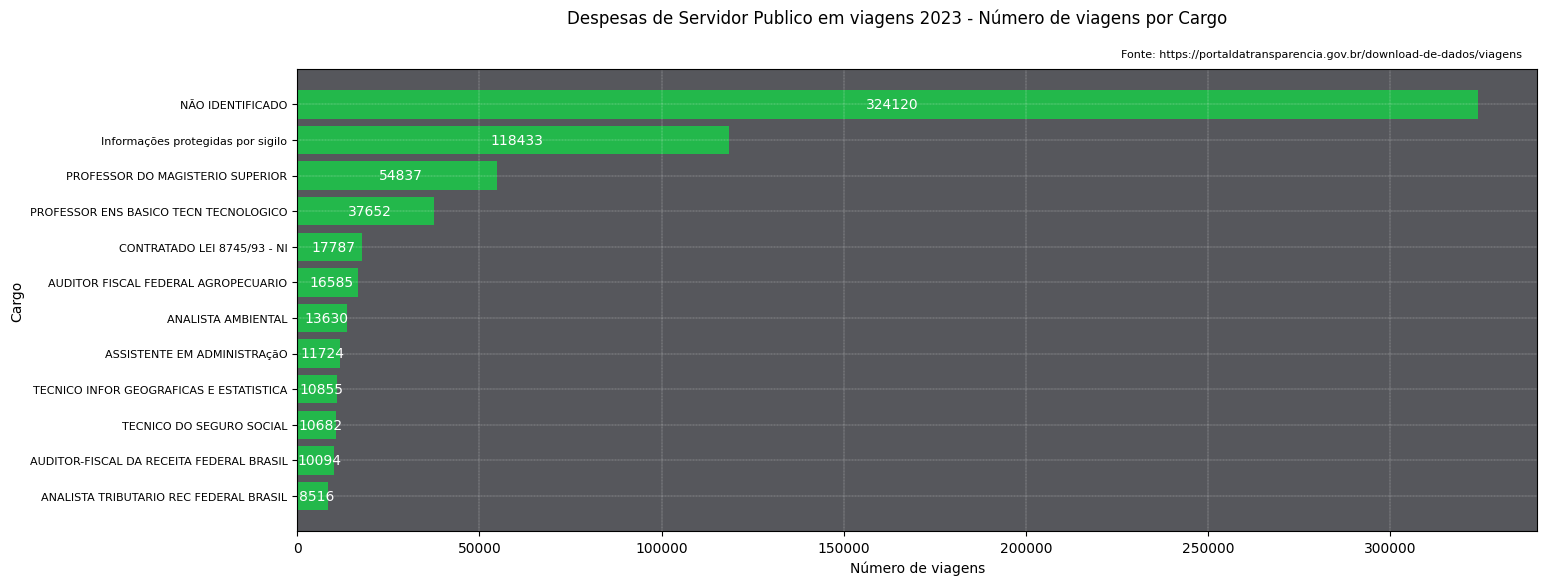

In [49]:
#trocar o caminho da pasta entre apóstrofes para a que estiver utilizando.
caminho_graf1 = f'/content/drive/MyDrive/Análise de Dados de viagens realizadas - Portal da transparência/output/graf1_numero_de_viagens_{Ano}.PNG'

fig, ax = plt.subplots(figsize=(16,6))
ax.barh(df_final['Cargo'], df_final['numero_de_viagens'], color='#23b84b')
ax.set_facecolor('#56575c')
ax.invert_yaxis()
fig.suptitle(f'Despesas de Servidor Publico em viagens {Ano} - Número de viagens por Cargo')
ax.bar_label(ax.containers[0], label_type='center', padding=3, rotation=360, color='white')
fig.text(0.64, 0.9, 'Fonte: https://portaldatransparencia.gov.br/download-de-dados/viagens', fontsize=8)
plt.yticks(fontsize=8)
plt.grid(color='white', linestyle='--', linewidth=0.2)
plt.xlabel('Número de viagens')
plt.ylabel('Cargo')
plt.savefig(caminho_graf1, bbox_inches='tight')

#É necessário verificar a relação entre os dataframes, verificando os cargos do consolidado, que estão dentro de cargos relevantes acima de 1%

In [50]:
filtro = df_viagens_consolidado['Cargo'].isin(cargos_relevantes)

In [51]:
#definição da base fonte, classificada por despesas médias
df_final = df_viagens_consolidado[filtro].sort_values(by='despesas_médias', ascending=False)

#Despesas de Servidor Publico em viagens - Média de despesas

- Neste gráfico há um Ranking da média de despesas por cargo
- 1° o **Técnico de Seguro social** é o cargo que em média tem despesas em 2023 de **4.305,08 reais**
-2° os cargos **não identificados** correspondem a tratativa NAN, e estão com média de despesas em 2023 de **3.260,38 reais**
-3° os cargos **protegidos por sigilo** estão com média de despesas em 2023 de **3.176,92 reais**

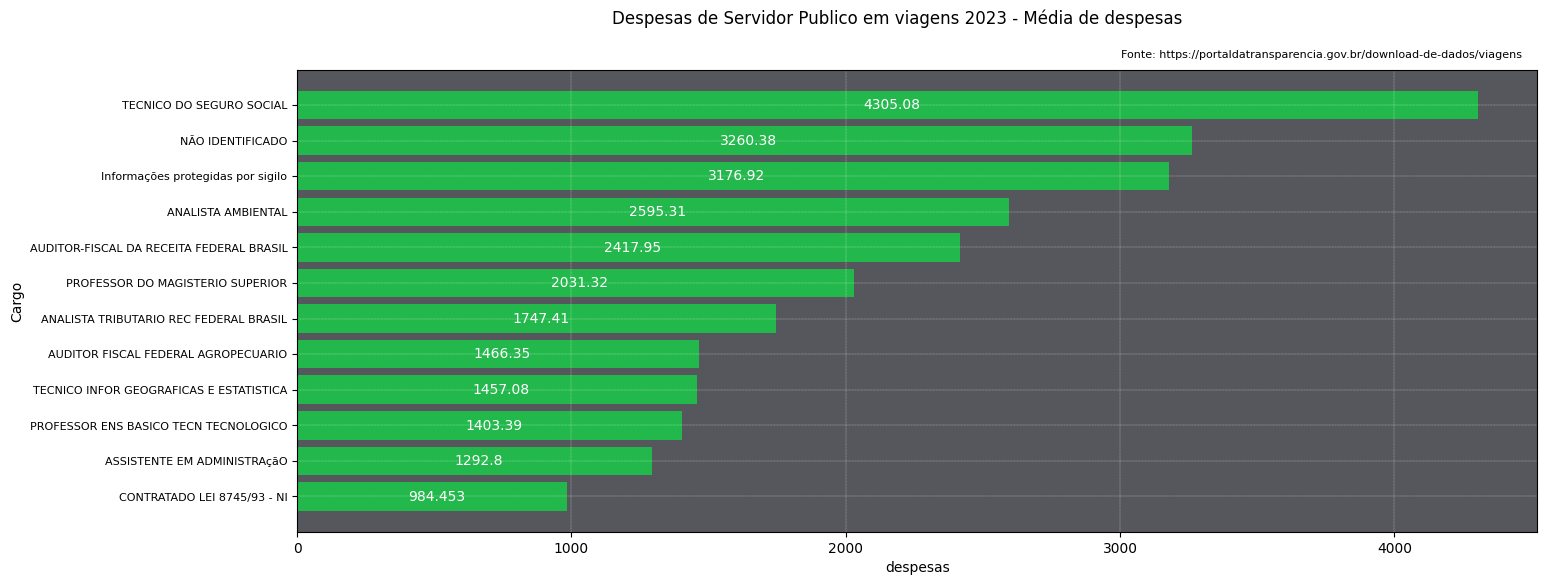

In [52]:
#trocar o caminho da pasta entre apóstrofes para a que estiver utilizando.
caminho_graf2 = f'/content/drive/MyDrive/Análise de Dados de viagens realizadas - Portal da transparência/output/graf2_despesas_medias_{Ano}.PNG'

fig, ax = plt.subplots(figsize=(16,6))
ax.barh(df_final['Cargo'], df_final['despesas_médias'], color='#23b84b')
ax.set_facecolor('#56575c')
ax.invert_yaxis()
ax.bar_label(ax.containers[0], label_type='center', padding=3, rotation=360, color='white')
fig.suptitle(f'Despesas de Servidor Publico em viagens {Ano} - Média de despesas')
fig.text(0.64, 0.9, 'Fonte: https://portaldatransparencia.gov.br/download-de-dados/viagens', fontsize=8)
plt.yticks(fontsize=8)
plt.grid(color='white', linestyle='--', linewidth=0.2)
plt.xlabel('despesas')
plt.ylabel('Cargo')
plt.savefig(caminho_graf2, bbox_inches='tight')

#Despesas de Servidor Publico em viagens - Dispersão alpha - Dias de viagem por despesas

- As despesas são maires quanto mais dias de viagens, parece óbvio mas depende muito da razão de **despesas / dias viajando**. Alguns casos há anos viajando com gasto pequeno demais. Não é o objetivo deste projeto.
- As viagens de até **100 dias** tem as maiores despesas
- É necessário um zoom, até **100 dias** e até **25 mil reais** pois há uma concentração neste ponto.
- Há pontos dispersos, **outliers relevantes**, como objetivo deste projeto, muito distantes do aglomerado/concentrado, que chamam atenção pois são viagens curtas com despesas muito altas


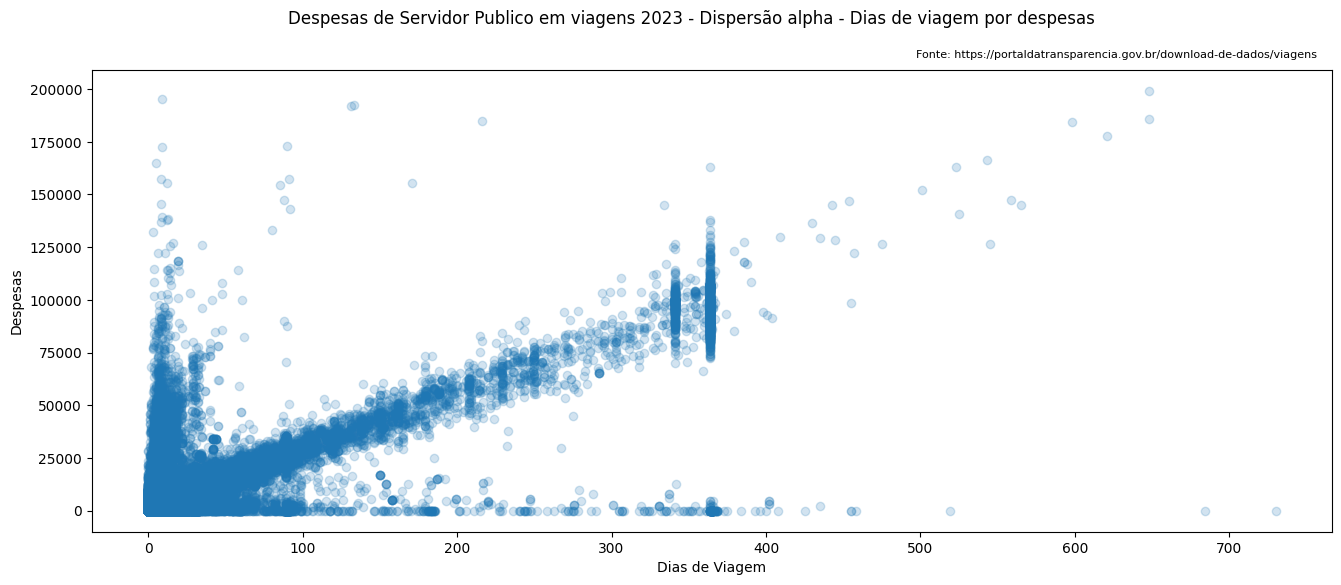

In [53]:
#trocar o caminho da pasta entre apóstrofes para a que estiver utilizando.
caminho_graf3 = f'/content/drive/MyDrive/Análise de Dados de viagens realizadas - Portal da transparência/output/graf3_dispersao_diasDeViagem_despesas1_{Ano}.PNG'

fig, ax = plt.subplots(figsize=(16,6))
fig.suptitle(f'Despesas de Servidor Publico em viagens {Ano} - Dispersão alpha - Dias de viagem por despesas')
fig.text(0.64, 0.9, 'Fonte: https://portaldatransparencia.gov.br/download-de-dados/viagens', fontsize=8)
plt.xlabel('Dias de Viagem')
plt.ylabel('Despesas')
ax.scatter(df_viagens['Dias de Viagem'], df_viagens['Despesas'], alpha=0.2)
plt.savefig(caminho_graf3, bbox_inches='tight')




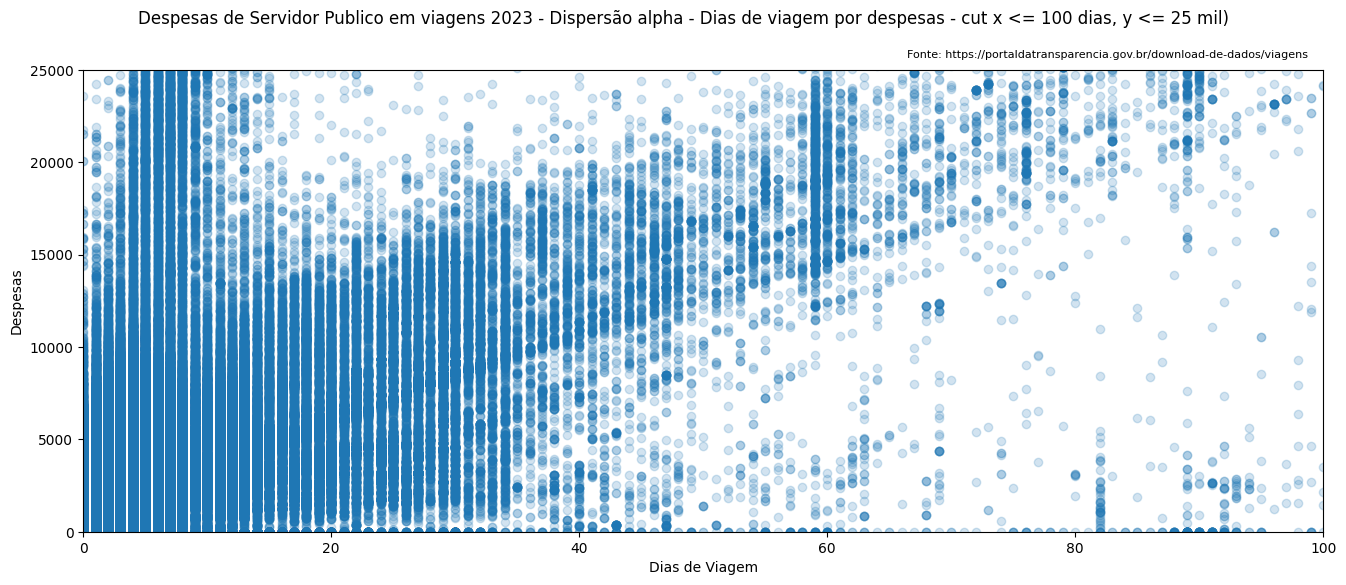

In [54]:
#é possível verificar agora que viagens de até 35 dias tem despesas em torno de 15 mil reais.

#trocar o caminho da pasta entre apóstrofes para a que estiver utilizando.
caminho_graf4 = f'/content/drive/MyDrive/Análise de Dados de viagens realizadas - Portal da transparência/output/graf4_dispersao_diasDeViagem_despesas2_{Ano}.PNG'

fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(df_viagens['Dias de Viagem'], df_viagens['Despesas'], alpha=0.2)
fig.suptitle(f'Despesas de Servidor Publico em viagens {Ano} - Dispersão alpha - Dias de viagem por despesas - cut x <= 100 dias, y <= 25 mil)')
fig.text(0.64, 0.9, 'Fonte: https://portaldatransparencia.gov.br/download-de-dados/viagens', fontsize=8)
plt.xlabel('Dias de Viagem')
plt.ylabel('Despesas')
ax.set_xlim(0,100)
ax.set_ylim(0,25_000)
plt.savefig(caminho_graf4, bbox_inches='tight')


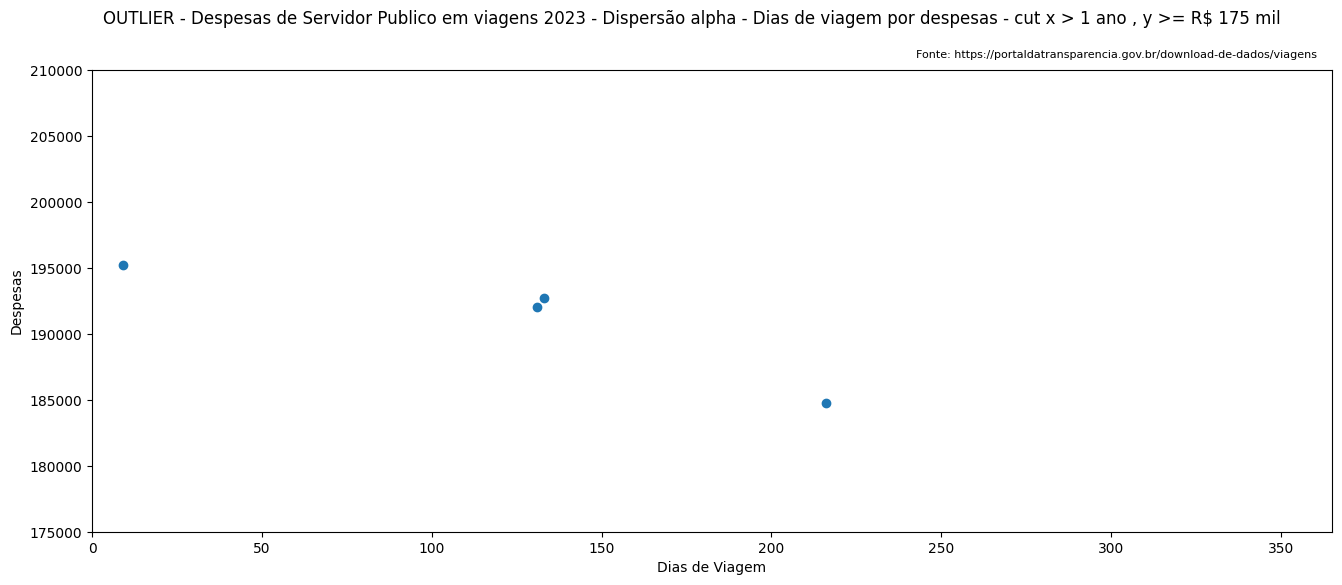

In [55]:
#zoom para dias de viagem até 1 ano, e despesas acima de 175 mil
#Há viagens com períodos muito curtos com alta despesa
#neste caso os outliers não podem ser desconsiderados, já que se trata de despesas por cargo.

#trocar o caminho da pasta entre apóstrofes para a que estiver utilizando.
caminho_graf5 = f'/content/drive/MyDrive/Análise de Dados de viagens realizadas - Portal da transparência/output/graf5_OUTLIER_dispersao_diasDeViagem_despesas3_{Ano}.PNG'

fig, ax = plt.subplots(figsize=(16,6))
ax.scatter(df_viagens['Dias de Viagem'], df_viagens['Despesas'])
fig.suptitle(f'OUTLIER - Despesas de Servidor Publico em viagens {Ano} - Dispersão alpha - Dias de viagem por despesas - cut x > 1 ano , y >= R$ 175 mil')
fig.text(0.64, 0.9, 'Fonte: https://portaldatransparencia.gov.br/download-de-dados/viagens', fontsize=8)
plt.xlabel('Dias de Viagem')
plt.ylabel('Despesas')
ax.set_xlim(0,365)
ax.set_ylim(175_000,210_000)
plt.savefig(caminho_graf5, bbox_inches= 'tight')

In [56]:
#este filtro determina a tabela dos outliers
filtro2 = (df_viagens['Despesas'] > 175_000) & (df_viagens['Dias de Viagem'] < 365)


#Considerando as viagens até 1 ano


---

#VIAGEM EM DESTAQUE - identificada no outlier no gráfico exploratório scatter (dispersão)

Há 1 viagem de 9 dias de Ministério com gasto +190 mil reais como **visitas oficiais a
países do Sudeste Asiático**, com vários destinos para **Jacarta/Indonésia, Phnom Penh/Camboja**, ocorreu uma mudança de itinerário por conta de ações na Faixa de Gaza.

O arquivo de **Passagens** baixado no link abaixo, que esta na pasta do Portal da transparência pode haver respostas melhores para este registro.



```
https://portaldatransparencia.gov.br/download-de-dados/viagens
```

---

#Outras viagens
Foram identificados **2 viagens de +130 dias**, cargos **não identificados**, com função **CCX-207** que corresponde a **"Cargo Comissionado Executivo"** estabelecidas em decreto, que acompanharam a **ex Presidente Dilma Roussef**, e geraram um gasto de **+190 mil reais** começaram no mesmo dia no **mês de março/2023** destino para **Xangai/China**


Há **1 viagem de 216 dias** com **órgão solicitante** como **Polícia federal** com despesas de +184 mil e começou em **junho/2023**, como é definido como sigiloso não foi especificado o destino.

O restante não é possível obter quaisquer dados de identificação, cargo e destino.

In [57]:
df_viagens[filtro2]

,Identificador do processo de viagem,Número da Proposta (PCDP),Situação,Viagem Urgente,Justificativa Urgência Viagem,Código do órgão superior,Nome do órgão superior,Código órgão solicitante,Nome órgão solicitante,CPF viajante,Nome,Cargo,Função,Descrição Função,Período - Data de início,Período - Data de fim,Destinos,Motivo,Valor diárias,Valor passagens,Valor devolução,Valor outros gastos,Despesas,Mês da viagem,Dias de Viagem
129260,18782567,000277/23-5C,Realizada,SIM,A autorização de afastamento foi publicada hoj...,20000,Presidência da República,20000,Presidência da República - Unidades com víncul...,***.739.980-**,LEANDRO AUGUSTO ANDERSON,NÃO IDENTIFICADO,CCX-0207,CCX-0207,2023-03-26,2023-08-04,"Xangai/China, São Paulo/SP",Conforme o previsto no Decreto nº 6.381 de 27 ...,174812.69,11610.06,0.00,5625.81,192048.56,March,131
129310,18782625,000289/23-5C,Realizada,SIM,Devido ao cancelamento da Visita Oficial do PR...,20000,Presidência da República,20000,Presidência da República - Unidades com víncul...,***.919.570-**,LUIS CARLOS MACHADO DA SILVA,NÃO IDENTIFICADO,CCX-0207,CCX-0207,2023-03-26,2023-08-06,"Xangai/China, São Paulo/SP",Conforme o previsto no Decreto nº 6.381 de 27 ...,175337.40,11757.14,0.00,5581.48,192676.02,March,133
207431,18877982,Informações p,Realizada,NÃO,Informação protegida por sigilo nos termos da ...,30000,Ministério da Justiça e Segurança Pública,30108,Polícia Federal,ID006200249,Informações protegidas por sigilo,Informações protegidas por sigilo,-11,Informações protegidas por sigilo,2023-06-18,2024-01-20,Informações protegidas por sigilo,Informação protegida por sigilo nos termos da ...,160692.47,14583.60,0.00,9511.35,184787.42,June,216
467757,19194886,004304/23,Realizada,SIM,Mudança de itinerário devido à situação na Fai...,35000,Ministério das Relações Exteriores,35000,Ministério das Relações Exteriores - Unidades ...,***.501.297-**,MAURO LUIZ IECKER VIEIRA,MINISTRO DE PRIMEIRA CLASSE,CNE-0001,Cargo de Natureza Especial,2023-10-06,2023-10-15,"Jacarta/Indonésia, Phnom Penh/Camboja, Nova Yo...",Visitas oficiais a países do Sudeste Asiático.,8468.86,186723.29,0.00,0.00,195192.15,October,9


In [58]:
#A soma de todas despesas nos 8 registros
df_viagens[filtro2]['Despesas'].sum()

764704.15

In [59]:
#a média de dias de viagen nos 8 regisros
df_viagens[filtro2]['Dias de Viagem'].mean()


122.25

In [60]:
#este arquivo pode conter dados relevantes sobre a viagem em destaque anteriormente
caminho_dados_passagens = '/content/drive/MyDrive/Análise de Dados de viagens realizadas - Portal da transparência/2023_Passagem.csv'



In [61]:
#Criando um dataframe para o arquivo de passagens
df_passagens = pd.read_csv(caminho_dados_passagens, sep=';', encoding='windows - 1252', decimal=',')


In [62]:
#Há um ID que identifica a viagem que é "19194886", pode ser utilizado para consultar a passagem em destaque e o itinerário no arquivo de passagens.
#Neste arquivo de Passagens a coluna com os IDs possui campo "Identificador do processo de viagem", que também existe no arquivo de viagens
df_passagens

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
0,18159396,000001/23,Aéreo,Brasil,Rio de Janeiro,Rio de Janeiro,Reino Unido,NaN,Aberdeen,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,3940.94,6.31,11/08/2022,20:26
1,18159396,000001/23,Aéreo,Reino Unido,NaN,Aberdeen,Brasil,Rio de Janeiro,Rio de Janeiro,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,3940.94,6.31,11/08/2022,20:26
2,18288418,000007/23-1C,Aéreo,Brasil,Distrito Federal,Brasília,Estados Unidos da América,NaN,Nova York,Estados Unidos da América,NaN,Nova York,Brasil,Distrito Federal,Brasília,7434.13,0.00,04/11/2022,11:04
3,18302983,000001/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,9903.32,4999.78,15/09/2022,13:39
4,18306758,000002/23,Aéreo,Brasil,São Paulo,São Paulo,Suécia,NaN,Gotemburgo,Suécia,NaN,Gotemburgo,Brasil,São Paulo,São Paulo,9903.32,4999.78,15/09/2022,13:42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389666,2023001628,Sem informaçã,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,2791.41,0.00,NaN,00:00
389667,2023001628,Sem informaçã,Aéreo,Brasil,São Paulo,São Paulo,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,1764.54,0.00,NaN,00:00
389668,2023001631,Sem informaçã,Aéreo,Brasil,Distrito Federal,Brasília,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,1985.65,0.00,NaN,00:00
389669,2023001631,Sem informaçã,Aéreo,Brasil,São Paulo,São Paulo,Brasil,Distrito Federal,Brasília,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,1759.88,0.00,NaN,00:00


In [63]:
df_passagens[df_passagens['Identificador do processo de viagem'] == 19194886]

,Identificador do processo de viagem,Número da Proposta (PCDP),Meio de transporte,País - Origem ida,UF - Origem ida,Cidade - Origem ida,País - Destino ida,UF - Destino ida,Cidade - Destino ida,País - Origem volta,UF - Origem volta,Cidade - Origem volta,Pais - Destino volta,UF - Destino volta,Cidade - Destino volta,Valor da passagem,Taxa de serviço,Data da emissão/compra,Hora da emissão/compra
232881,19194886,004304/23,Aéreo,Estados Unidos da América,NaN,Nova York,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,35304.33,0.00,20/11/2023,17:47
232882,19194886,004304/23,Aéreo,Brasil,São Paulo,São Paulo,Indonésia,NaN,Jacarta,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,41529.96,0.00,22/08/2023,14:53
232883,19194886,004304/23,Aéreo,Camboja,NaN,Phnom Penh,Cingapura,NaN,Cingapura,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,6368.97,0.00,17/10/2023,16:33
232884,19194886,004304/23,Aéreo,Estados Unidos da América,NaN,Nova York,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,51557.43,0.00,17/10/2023,17:58
232885,19194886,004304/23,Aéreo,Indonésia,NaN,Jacarta,Camboja,NaN,Phnom Penh,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,1667.56,0.00,22/08/2023,14:53
232886,19194886,004304/23,Aéreo,Filipinas,NaN,San Juan - Metro Manila,Brasil,São Paulo,São Paulo,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,7926.43,0.00,20/09/2023,11:06
232887,19194886,004304/23,Aéreo,Cingapura,NaN,Cingapura,Estados Unidos da América,NaN,Nova York,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,Sem informação,42368.61,0.00,17/10/2023,17:57


In [64]:
#verificando o arquivo trechos, para ver a ordem das viagens
caminho_dados_trecho = '/content/drive/MyDrive/Análise de Dados de viagens realizadas - Portal da transparência/2023_Trecho.csv'
df_trechos = pd.read_csv(caminho_dados_trecho, sep=';', encoding='windows - 1252', decimal=',')

In [65]:
df_trechos[df_trechos['Identificador do processo de viagem '] == 19194886].sort_values(by='Sequência Trecho', ascending=True)

,Identificador do processo de viagem,Número da Proposta (PCDP),Sequência Trecho,Origem - Data,Origem - País,Origem - UF,Origem - Cidade,Destino - Data,Destino - País,Destino - UF,Destino - Cidade,Meio de transporte,Número Diárias,Missao?
1022732,19194886,004304/23,1,06/10/2023,Brasil,Distrito Federal,Brasília,07/10/2023,Brasil,São Paulo,São Paulo,Aéreo,0.50,Não
1022727,19194886,004304/23,2,07/10/2023,Brasil,São Paulo,São Paulo,10/10/2023,Indonésia,NaN,Jacarta,Aéreo,1.50,Sim
1022726,19194886,004304/23,3,10/10/2023,Indonésia,NaN,Jacarta,12/10/2023,Camboja,NaN,Phnom Penh,Aéreo,1.00,Sim
1022729,19194886,004304/23,4,12/10/2023,Camboja,NaN,Phnom Penh,12/10/2023,Cingapura,NaN,Cingapura,Aéreo,0.00,Não
1022731,19194886,004304/23,5,12/10/2023,Cingapura,NaN,Cingapura,14/10/2023,Estados Unidos da América,NaN,Nova York,Aéreo,1.00,Sim
1022730,19194886,004304/23,6,14/10/2023,Estados Unidos da América,NaN,Nova York,15/10/2023,Brasil,São Paulo,São Paulo,Aéreo,1.00,Não
1022728,19194886,004304/23,7,15/10/2023,Brasil,São Paulo,São Paulo,15/10/2023,Brasil,Distrito Federal,Brasília,Aéreo,0.00,Não


In [66]:
df_final.to_excel(caminho_output, index=False)